<a href="https://colab.research.google.com/github/hamdjalil/SE_admin/blob/main/Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Colab to find the data distribution of dresses in a dataset.

Libraries

In [ ]:
import os
import math
import cv2
from google.colab.patches import cv2_imshow
from glob import glob 

Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


Path

In [ ]:
path = '/content/gdrive/MyDrive/ML/Code/DeepFashion_Try_On_v1/DeepFashion_Try_On/Datasets/' 
os.chdir(path)

Loading Data

In [ ]:
dataset =  '../Datasets/Low Res Mix/experiment_1/train_img'
ds = glob(dataset+"/**/*", recursive = True)

print("Train Data Size", len(ds))

dataset =  '../Datasets/Low Res Mix/experiment_1/test_img'
testset = glob(dataset+"/**/*", recursive = True)

print("Test Data Size", len(testset))

Train Data Size 1284
Test Data Size 352


Finding the number of different dresses and visualizing the images

1284
dress17


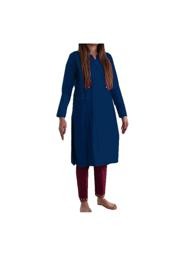

dress8


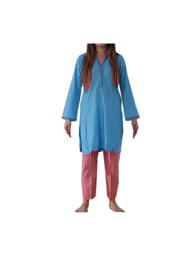

dress7


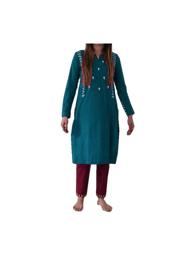

dress3


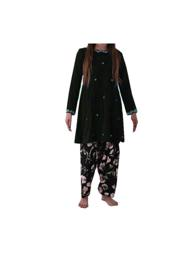

dress1


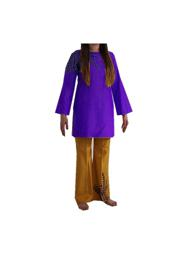

dress14


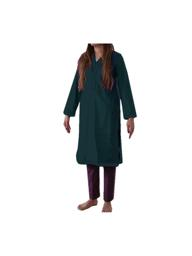

dress4


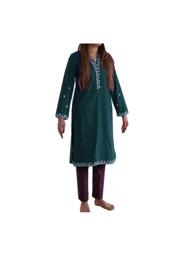

dress2


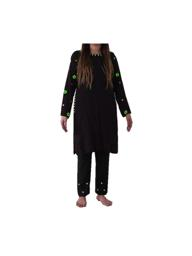

dress12


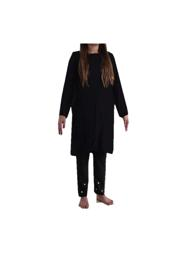

dress19


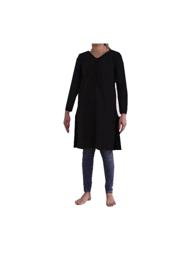

dress9


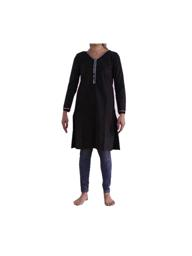

dress13


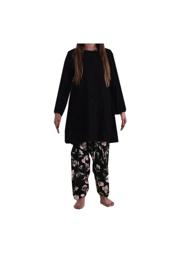

Number of different dresses: 12


In [ ]:
od = []
img = {}
print(len(ds))

for i in ds:
  r = i.split("/")[-1]
  d = r.split("_")[0]

  if d not in od:
    od.append(d)
  else:
    continue

  print(d)

  x = cv2.imread(i)
  img.update({d:x})
  cv2_imshow(x)

print("Number of different dresses:", len(od))

Finding the number of each dress type in the data

In [ ]:
pc = {}
counter = 1
for i in ds:
  x = i.split("/")[-1]
  d = x.split("_")[0]
  if d not in pc.keys():
    pc.update({d:counter})
  else:
    pc[d] = pc[d] + 1

print(pc)
print(sum(pc.values()))

{'dress17': 156, 'dress8': 312, 'dress7': 156, 'dress3': 208, 'dress1': 104, 'dress14': 104, 'dress4': 104, 'dress2': 80, 'dress12': 8, 'dress19': 18, 'dress9': 18, 'dress13': 16}
1284


Finding the number of colours for each dress type

In [ ]:
oc = []
counter = 0
print(len(ds))
dic = {}

for i in od:
  for x in ds:
    r = x.split("/")[-1]
    d = r.split("_")[0]

    if i == d:
      c = r.split("_")[1]
      if c not in oc:
        oc.append(c)
        counter = counter + 1
  #print(oc, counter)
  dic.update({i:counter})
  counter = 0
  oc = []

print(dic)

1284
{'dress17': 13, 'dress8': 13, 'dress7': 13, 'dress3': 13, 'dress1': 13, 'dress14': 13, 'dress4': 13, 'dress2': 10, 'dress12': 1, 'dress19': 1, 'dress9': 1, 'dress13': 1}


###Combined summary

Dataset Size: 1284
Number of different dress types: 12


Dress name: dress17
Number of dress17 images in the dataset: 156
Percentage of this dress type in dataset: 12.15 %
Number of colours of dress17 in the dataset: 13


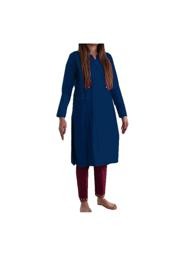



Dress name: dress8
Number of dress8 images in the dataset: 312
Percentage of this dress type in dataset: 24.299 %
Number of colours of dress8 in the dataset: 13


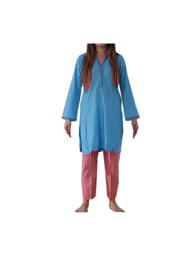



Dress name: dress7
Number of dress7 images in the dataset: 156
Percentage of this dress type in dataset: 12.15 %
Number of colours of dress7 in the dataset: 13


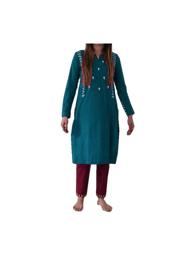



Dress name: dress3
Number of dress3 images in the dataset: 208
Percentage of this dress type in dataset: 16.199 %
Number of colours of dress3 in the dataset: 13


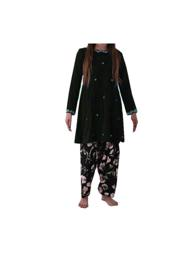



Dress name: dress1
Number of dress1 images in the dataset: 104
Percentage of this dress type in dataset: 8.1 %
Number of colours of dress1 in the dataset: 13


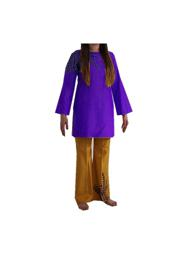



Dress name: dress14
Number of dress14 images in the dataset: 104
Percentage of this dress type in dataset: 8.1 %
Number of colours of dress14 in the dataset: 13


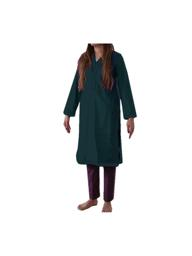



Dress name: dress4
Number of dress4 images in the dataset: 104
Percentage of this dress type in dataset: 8.1 %
Number of colours of dress4 in the dataset: 13


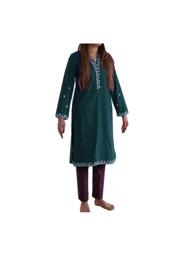



Dress name: dress2
Number of dress2 images in the dataset: 80
Percentage of this dress type in dataset: 6.231 %
Number of colours of dress2 in the dataset: 10


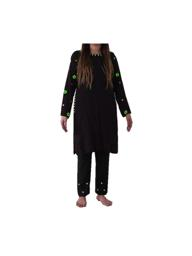



Dress name: dress12
Number of dress12 images in the dataset: 8
Percentage of this dress type in dataset: 0.623 %
Number of colours of dress12 in the dataset: 1


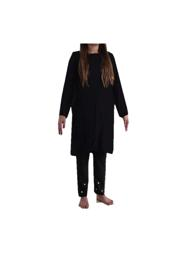



Dress name: dress19
Number of dress19 images in the dataset: 18
Percentage of this dress type in dataset: 1.402 %
Number of colours of dress19 in the dataset: 1


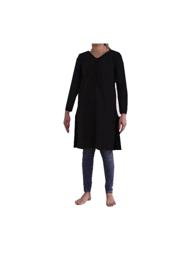



Dress name: dress9
Number of dress9 images in the dataset: 18
Percentage of this dress type in dataset: 1.402 %
Number of colours of dress9 in the dataset: 1


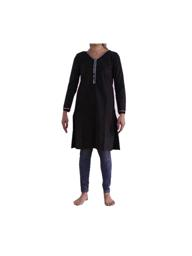



Dress name: dress13
Number of dress13 images in the dataset: 16
Percentage of this dress type in dataset: 1.246 %
Number of colours of dress13 in the dataset: 1


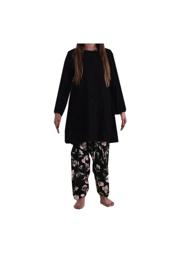

In [ ]:
print("Dataset Size:", len(ds))
print("Number of different dress types:", len(od))
print('\n')
for i in range(len(od)):
  print("Dress name:", od[i])
  print("Number of", od[i], "images in the dataset:", pc[od[i]])
  print("Percentage of this dress type in dataset:", round(pc[od[i]]/len((ds))*100, 3), "%")
  print("Number of colours of", od[i], "in the dataset:", dic[od[i]])
  cv2_imshow(img[od[i]])
  print("\n")

###Extracting a dress


In [ ]:
print(len(ds))
counter = 0
all_train_locs = []
for i in ds:
  r = i.split("/")[-1].split(".")[0]
  d = r.split("_")[0]
  if d in ["dress1", "dress14"]:
    # print(r)
    # x = cv2.imread(i)
    # img.update({d:x})
    # #cv2_imshow(x)
    counter = counter + 1
    dataset_dir =  '../Datasets/Low Res Mix/experiment_1/'
    ext = ['png', 'jpg']
    for e in ext:
      loc = glob(dataset_dir+"/**/" + r + '.' + e, recursive = True)
      #print(loc)
      for i in loc:
        all_train_locs.append(i)

    keyp_loc = glob(dataset_dir+"/**/" + r + '_keypoints.json', recursive = True)
    #print(keyp_loc)
    all_train_locs.append(keyp_loc[0])

print("Total files", len(all_train_locs))
print("Total number of dresses", counter)

1284
Total files 1040
Total number of dresses 208


In [ ]:
print(len(testset))
counter = 0
all_test_locs = []
for i in testset:
  r = i.split("/")[-1].split(".")[0]
  d = r.split("_")[0]
  if d in ["dress1", "dress14"]:
    # print(r)
    # x = cv2.imread(i)
    # img.update({d:x})
    # #cv2_imshow(x)
    counter = counter + 1
    dataset_dir =  '../Datasets/Low Res Mix/experiment_1/'
    ext = ['png', 'jpg']
    for e in ext:
      loc = glob(dataset_dir+"/**/" + r + '.' + e, recursive = True)
      #print(loc)
      for i in loc:
        all_test_locs.append(i)

    keyp_loc = glob(dataset_dir+"/**/" + r + '_keypoints.json', recursive = True)
    #print(keyp_loc)
    all_test_locs.append(keyp_loc[0])

print("Total files", len(all_test_locs))
print("Total number of dresses", counter)

352
Total files 320
Total number of dresses 64


In [ ]:
import shutil

dir = []
for i in all_train_locs:
  #print(i)
  new_dest = i.split('/')[4]
  if new_dest not in dir:
    dir.append(new_dest)
    path = '/content/gdrive/MyDrive/ML/Code/DeepFashion_Try_On_v1/DeepFashion_Try_On/Datasets/LongAndShortDress/'+new_dest+'/'
    os.makedirs(path)

  shutil.copy(i, '/content/gdrive/MyDrive/ML/Code/DeepFashion_Try_On_v1/DeepFashion_Try_On/Datasets/LongAndShortDress/'+new_dest+'/')

print("Done")

Done


In [ ]:
new =  '../Datasets/LongAndShortDress/train_label'
new_files = glob(new+'/*', recursive = True)
print(len(new_files))

208


In [ ]:
dir = []
for i in all_test_locs:
  #print(i)
  new_dest = i.split('/')[4]
  if new_dest not in dir:
    dir.append(new_dest)
    path = '/content/gdrive/MyDrive/ML/Code/DeepFashion_Try_On_v1/DeepFashion_Try_On/Datasets/LongAndShortDress/'+new_dest+'/'
    os.makedirs(path)

  shutil.copy(i, '/content/gdrive/MyDrive/ML/Code/DeepFashion_Try_On_v1/DeepFashion_Try_On/Datasets/LongAndShortDress/'+new_dest+'/')

print("Done")

new =  '../Datasets/LongAndShortDress/test_label'
new_files = glob(new+'/*', recursive = True)
print(len(new_files))

Done
64


In [ ]:
path = '/content/gdrive/MyDrive/ML/Code/DeepFashion_Try_On_v1/DeepFashion_Try_On/Datasets/LongAndShortDress/train_mask/'
if not os.path.exists(path):
  os.makedirs(path)

src ='/content/gdrive/MyDrive/ML/Code/DeepFashion_Try_On_v1/DeepFashion_Try_On/Datasets/Low Res Mix/experiment_1/train_mask/'

for i in os.listdir(src):
  shutil.copy(src+i, path)
